<a href="https://colab.research.google.com/github/frfusch21/DTS_GGU_5/blob/Elisabeth-S/tarif_all_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
df_all = pd.read_csv('all-data_clean.csv')
df_all.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346
1,2,Guadalajara Easy Taxi,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971,N,389,2962,3675
2,3,Monterrey,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387,N,168,951,0
3,4,Monterrey,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294,N,1659,11082,358
4,5,Monterrey,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862,N,272,2021,3614


In [3]:
df_all['vendor_name'] = df_all['vendor_id']
df_all

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,vendor_name
0,1,Quito,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346,Quito
1,2,Guadalajara Easy Taxi,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971,N,389,2962,3675,Guadalajara Easy Taxi
2,3,Monterrey,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387,N,168,951,0,Monterrey
3,4,Monterrey,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294,N,1659,11082,358,Monterrey
4,5,Monterrey,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862,N,272,2021,3614,Monterrey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90282,90283,Quito,2016-10-25 04:58:55,2016-10-25 05:00:25,0.706498,0.552770,-78.550306,-0.256756,N,91,43,70,Quito
90283,90284,Bogotá,2016-10-26 04:27:39,2016-10-28 06:50:28,0.369432,0.762872,-74.050725,4.714622,N,138169,5934,354,Bogotá
90284,90285,México DF Taxi de Sitio,2016-10-28 06:49:41,2016-10-28 06:51:25,0.089643,0.308893,-99.194622,19.396717,N,104,49,96,México DF Taxi de Sitio
90285,90286,Quito,2016-10-28 06:47:59,2016-10-28 06:58:31,0.431407,0.724499,-78.446296,-0.327428,N,633,3296,150,Quito


In [4]:
le = LabelEncoder()

df_all['vendor_id']= le.fit_transform(df_all['vendor_id'])
df_all

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,vendor_name
0,1,97,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346,Quito
1,2,43,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971,N,389,2962,3675,Guadalajara Easy Taxi
2,3,71,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387,N,168,951,0,Monterrey
3,4,71,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294,N,1659,11082,358,Monterrey
4,5,71,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862,N,272,2021,3614,Monterrey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90282,90283,97,2016-10-25 04:58:55,2016-10-25 05:00:25,0.706498,0.552770,-78.550306,-0.256756,N,91,43,70,Quito
90283,90284,10,2016-10-26 04:27:39,2016-10-28 06:50:28,0.369432,0.762872,-74.050725,4.714622,N,138169,5934,354,Bogotá
90284,90285,81,2016-10-28 06:49:41,2016-10-28 06:51:25,0.089643,0.308893,-99.194622,19.396717,N,104,49,96,México DF Taxi de Sitio
90285,90286,97,2016-10-28 06:47:59,2016-10-28 06:58:31,0.431407,0.724499,-78.446296,-0.327428,N,633,3296,150,Quito


[Text(0.5, 1.0, 'Grafik Persebaran Jumlah Vendor')]

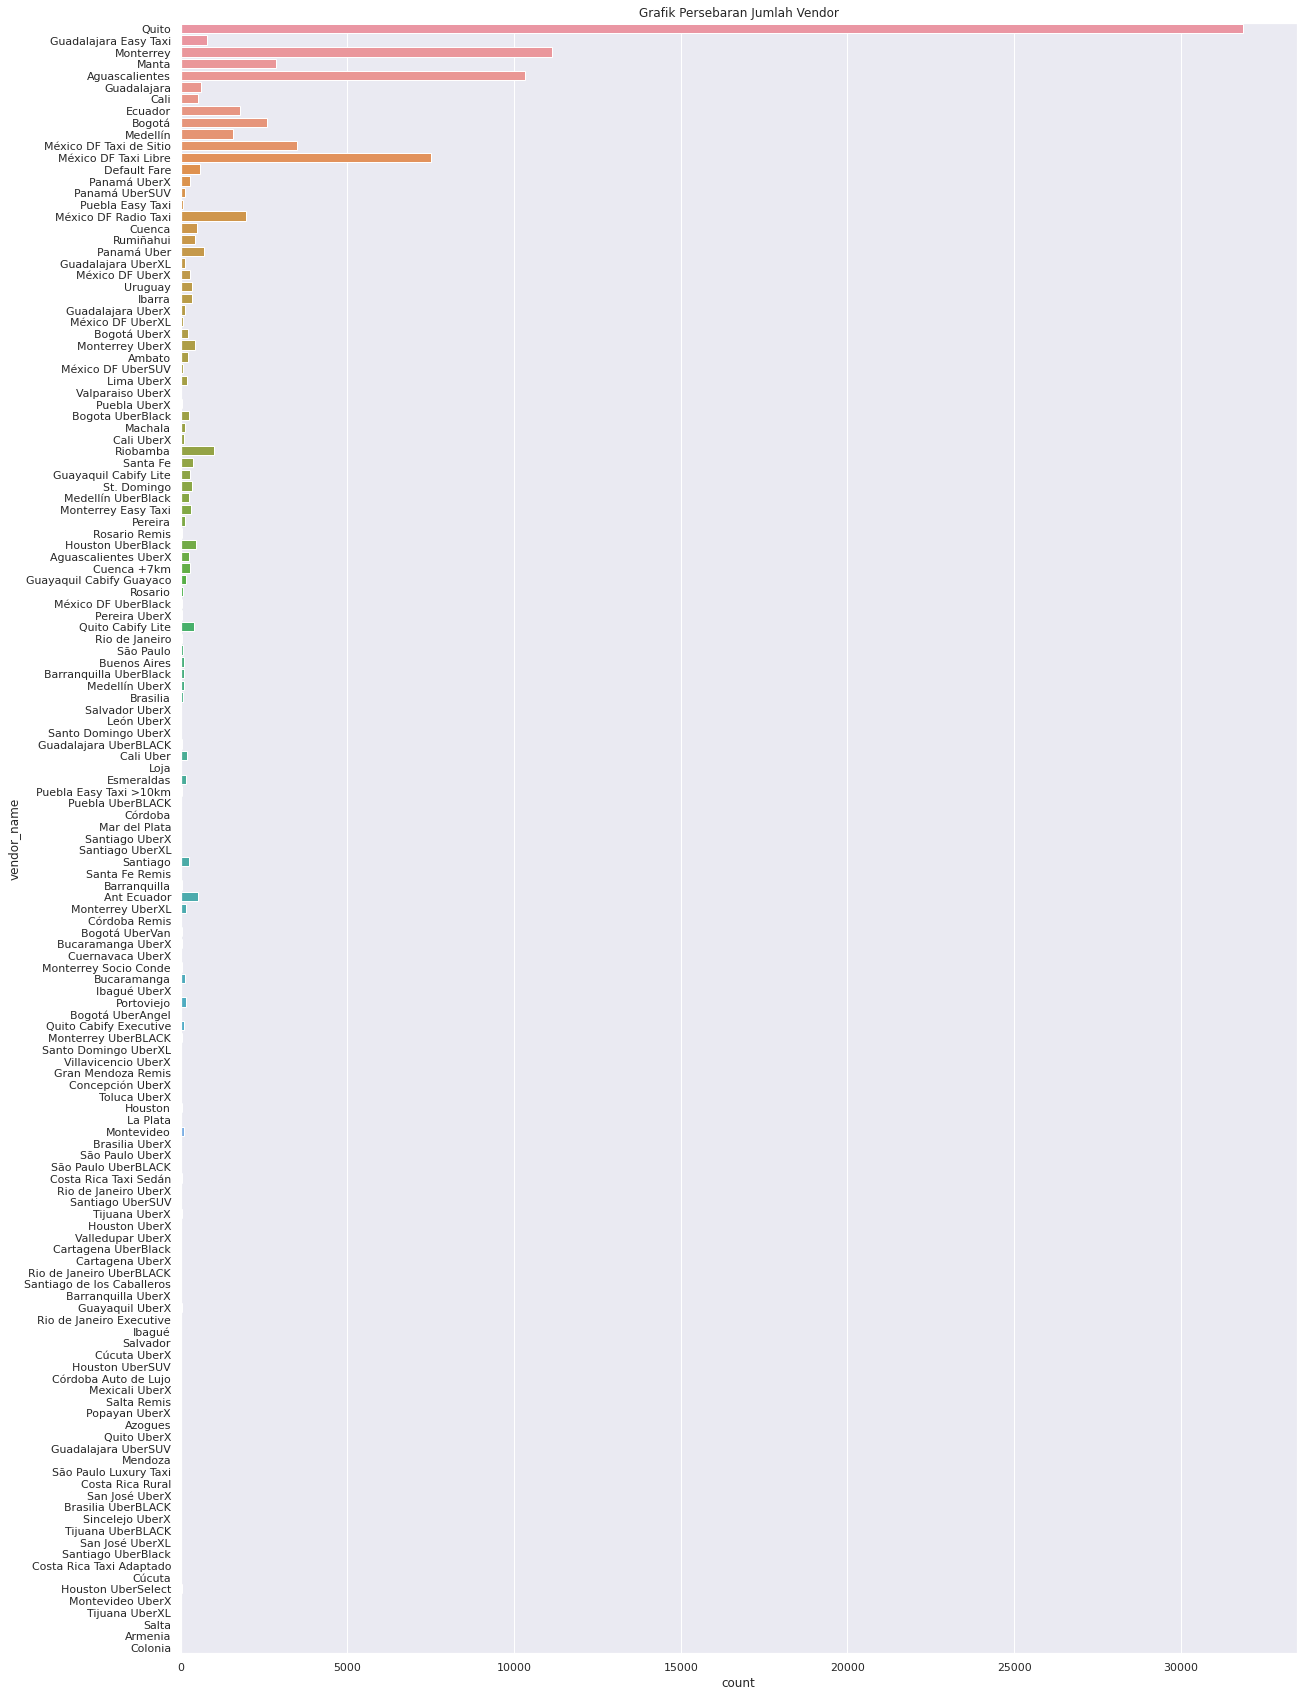

In [5]:
sns.set(rc = {'figure.figsize':(20,30)})
sns.countplot(data = df_all, y = df_all['vendor_name']).set(title='Grafik Persebaran Jumlah Vendor')

#Explore all data

In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90287 entries, 0 to 90286
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90287 non-null  int64  
 1   vendor_id           90287 non-null  int64  
 2   pickup_datetime     90287 non-null  object 
 3   dropoff_datetime    90287 non-null  object 
 4   pickup_longitude    90287 non-null  float64
 5   pickup_latitude     90287 non-null  float64
 6   dropoff_longitude   90287 non-null  float64
 7   dropoff_latitude    90287 non-null  float64
 8   store_and_fwd_flag  90287 non-null  object 
 9   trip_duration       90287 non-null  int64  
 10  dist_meters         90287 non-null  int64  
 11  wait_sec            90287 non-null  int64  
 12  vendor_name         90287 non-null  object 
dtypes: float64(4), int64(5), object(4)
memory usage: 9.0+ MB


In [7]:
#mengubah bentuk data pickup dan dropoff datetime ke bentuk datetime
df_all['pickup_datetime'] = pd.to_datetime(df_all.pickup_datetime, format='%Y-%m-%d %H:%M')
df_all['dropoff_datetime'] = pd.to_datetime(df_all.dropoff_datetime, format='%Y-%m-%d %H:%M')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90287 entries, 0 to 90286
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  90287 non-null  int64         
 1   vendor_id           90287 non-null  int64         
 2   pickup_datetime     90287 non-null  datetime64[ns]
 3   dropoff_datetime    90287 non-null  datetime64[ns]
 4   pickup_longitude    90287 non-null  float64       
 5   pickup_latitude     90287 non-null  float64       
 6   dropoff_longitude   90287 non-null  float64       
 7   dropoff_latitude    90287 non-null  float64       
 8   store_and_fwd_flag  90287 non-null  object        
 9   trip_duration       90287 non-null  int64         
 10  dist_meters         90287 non-null  int64         
 11  wait_sec            90287 non-null  int64         
 12  vendor_name         90287 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(5), ob

In [8]:
#membuat field pick_day pada dataset yang berisi hari pickup berdasarkan pickup_datetime
df_all['pickup_day'] = df_all['pickup_datetime'].dt.day_name()
#membuat field pick_date untuk memisahkan informasi tanggal pickup
df_all['pickup_date'] = df_all['pickup_datetime'].dt.date
df_all

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,vendor_name,pickup_day,pickup_date
0,1,97,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346,Quito,Saturday,2016-09-17
1,2,43,2016-09-17 09:59:54,2016-09-17 10:06:23,0.327804,0.391950,-103.366600,20.686971,N,389,2962,3675,Guadalajara Easy Taxi,Saturday,2016-09-17
2,3,71,2016-09-17 10:06:52,2016-09-17 10:09:40,0.140910,0.563280,-100.165737,25.619387,N,168,951,0,Monterrey,Saturday,2016-09-17
3,4,71,2016-09-17 09:45:56,2016-09-17 10:13:34,0.207565,0.590416,-100.491721,25.676294,N,1659,11082,358,Monterrey,Saturday,2016-09-17
4,5,71,2016-09-17 10:12:00,2016-09-17 10:16:31,0.128881,0.580419,-100.104166,25.643862,N,272,2021,3614,Monterrey,Saturday,2016-09-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90282,90283,97,2016-10-25 04:58:55,2016-10-25 05:00:25,0.706498,0.552770,-78.550306,-0.256756,N,91,43,70,Quito,Tuesday,2016-10-25
90283,90284,10,2016-10-26 04:27:39,2016-10-28 06:50:28,0.369432,0.762872,-74.050725,4.714622,N,138169,5934,354,Bogotá,Wednesday,2016-10-26
90284,90285,81,2016-10-28 06:49:41,2016-10-28 06:51:25,0.089643,0.308893,-99.194622,19.396717,N,104,49,96,México DF Taxi de Sitio,Friday,2016-10-28
90285,90286,97,2016-10-28 06:47:59,2016-10-28 06:58:31,0.431407,0.724499,-78.446296,-0.327428,N,633,3296,150,Quito,Friday,2016-10-28


In [9]:
#membuat dataset pickup yang berisi tanggal pickup dan jumlah pickup dan mengurutkannya dari kecil ke besar
pickup = pd.DataFrame(df_all.groupby(['pickup_date'])['id'].count())
pickup = pickup.reset_index()
pickup = pickup.sort_values('pickup_date', ascending=True)
pickup

,pickup_date,id
0,2014-12-31,2
1,2016-05-13,1
2,2016-05-27,1
3,2016-05-28,1
4,2016-05-31,1
...,...,...
415,2017-07-28,314
416,2017-07-29,223
417,2017-07-30,157
418,2017-07-31,245


In [10]:
#menghapus data pertama dr dataset pickup
pickup = pickup.drop(index=0)
pickup

,pickup_date,id
1,2016-05-13,1
2,2016-05-27,1
3,2016-05-28,1
4,2016-05-31,1
5,2016-06-03,1
...,...,...
415,2017-07-28,314
416,2017-07-29,223
417,2017-07-30,157
418,2017-07-31,245


[Text(0.5, 1.0, 'Grafik Jumlah Pickup taxi tahun 2016 - 2017')]

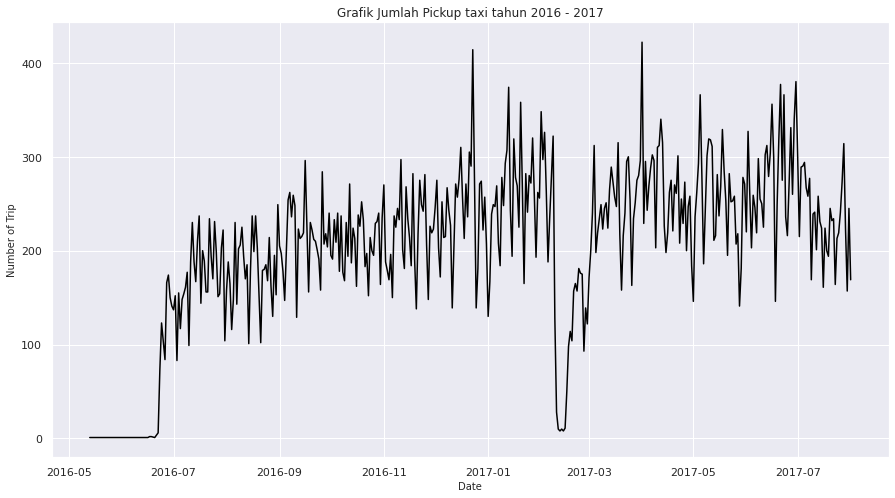

In [11]:
#membuat grafik garis pickup
graph = sns.set(rc = {'figure.figsize':(15,8)})
graph = sns.lineplot(data= pickup, x ='pickup_date', y = 'id', color = 'black')
graph.set_xlabel("Date", fontsize = 10)
graph.set_ylabel("Number of Trip", fontsize = 10)
graph.set(title='Grafik Jumlah Pickup taxi tahun 2016 - 2017')

#Tarif taxi per km

In [12]:
tarif = pd.read_csv('taxi_fare.csv')

tarif.head()

,vendor_name,base_fare,fare_per_km
0,Bogotá,1.16,1.62
1,Bogota UberBlack,0.74,0.24
2,Bogotá UberX,0.54,0.14
3,Bogotá UberVan,1.24,0.31
4,Bogotá UberAngel,NaN,NaN


In [13]:
tarif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vendor_name  139 non-null    object 
 1   base_fare    110 non-null    float64
 2   fare_per_km  110 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.4+ KB


In [14]:
#menggabungkan all data dengan data tarif
df_merge = df_all.merge(tarif, how='inner', on='vendor_name')
df_merge

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,vendor_name,pickup_day,pickup_date,base_fare,fare_per_km
0,1,97,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346,Quito,Saturday,2016-09-17,0.55,0.33
1,44,97,2016-09-18 04:03:20,2016-09-18 04:26:30,0.436887,0.792406,-78.490786,-0.104836,N,1390,16680,456,Quito,Sunday,2016-09-18,0.55,0.33
2,47,97,2016-09-16 06:29:36,2016-09-18 06:41:33,0.478847,0.104321,-78.470277,-0.131083,N,130317,1987,290,Quito,Friday,2016-09-16,0.55,0.33
3,49,97,2016-09-18 05:57:47,2016-09-18 06:30:00,0.713110,0.679551,-78.430220,-0.201934,N,1933,25146,302,Quito,Sunday,2016-09-18,0.55,0.33
4,53,97,2016-09-18 07:58:42,2016-09-18 08:14:29,0.674707,0.380694,-78.504558,-0.222462,N,948,4625,314,Quito,Sunday,2016-09-18,0.55,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90282,85834,25,2016-08-30 09:05:37,2016-08-30 09:11:42,0.346103,0.737281,-57.367625,-33.879289,N,366,2324,33,Colonia,Tuesday,2016-08-30,NaN,NaN
90283,85837,25,2016-08-30 09:15:24,2016-08-30 09:21:22,0.344720,0.739482,-57.372232,-33.868234,N,358,2551,12,Colonia,Tuesday,2016-08-30,NaN,NaN
90284,85839,25,2016-08-30 09:31:54,2016-08-30 09:35:26,0.344342,0.739320,-57.364720,-33.872070,N,213,1587,27,Colonia,Tuesday,2016-08-30,NaN,NaN
90285,85840,25,2016-08-30 09:36:02,2016-08-30 09:39:46,0.344980,0.738655,-57.357002,-33.869935,N,224,1175,50,Colonia,Tuesday,2016-08-30,NaN,NaN


In [15]:
#mengisi data kosong pada base_fare dengan nilai rata-ratanya
rata_tarif = df_merge['base_fare'].mean()
df_merge['base_fare'] = df_merge['base_fare'].fillna(rata_tarif)
df_merge['base_fare'].isna().sum()

0

In [16]:
#mengisi data kosong pada fare_per_km dengan nilai rata-ratanya
rata_tarif_km = df_merge['fare_per_km'].mean()
df_merge['fare_per_km'] = df_merge['fare_per_km'].fillna(rata_tarif_km)
df_merge['fare_per_km'].isna().sum()

0

In [17]:
df_merge

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,vendor_name,pickup_day,pickup_date,base_fare,fare_per_km
0,1,97,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346,Quito,Saturday,2016-09-17,0.550000,0.330000
1,44,97,2016-09-18 04:03:20,2016-09-18 04:26:30,0.436887,0.792406,-78.490786,-0.104836,N,1390,16680,456,Quito,Sunday,2016-09-18,0.550000,0.330000
2,47,97,2016-09-16 06:29:36,2016-09-18 06:41:33,0.478847,0.104321,-78.470277,-0.131083,N,130317,1987,290,Quito,Friday,2016-09-16,0.550000,0.330000
3,49,97,2016-09-18 05:57:47,2016-09-18 06:30:00,0.713110,0.679551,-78.430220,-0.201934,N,1933,25146,302,Quito,Sunday,2016-09-18,0.550000,0.330000
4,53,97,2016-09-18 07:58:42,2016-09-18 08:14:29,0.674707,0.380694,-78.504558,-0.222462,N,948,4625,314,Quito,Sunday,2016-09-18,0.550000,0.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90282,85834,25,2016-08-30 09:05:37,2016-08-30 09:11:42,0.346103,0.737281,-57.367625,-33.879289,N,366,2324,33,Colonia,Tuesday,2016-08-30,0.871203,0.538584
90283,85837,25,2016-08-30 09:15:24,2016-08-30 09:21:22,0.344720,0.739482,-57.372232,-33.868234,N,358,2551,12,Colonia,Tuesday,2016-08-30,0.871203,0.538584
90284,85839,25,2016-08-30 09:31:54,2016-08-30 09:35:26,0.344342,0.739320,-57.364720,-33.872070,N,213,1587,27,Colonia,Tuesday,2016-08-30,0.871203,0.538584
90285,85840,25,2016-08-30 09:36:02,2016-08-30 09:39:46,0.344980,0.738655,-57.357002,-33.869935,N,224,1175,50,Colonia,Tuesday,2016-08-30,0.871203,0.538584


In [18]:
#hitung tarif
#tarif km pertama adalah base_fare, dan untuk km selanjutnya adalah base_fare + fare per km
def total_fare(df_merge):
  if df_merge['dist_meters']/1000 < 1:
    return df_merge['base_fare']
  else:
    return df_merge['base_fare']+((df_merge['dist_meters']/1000)*df_merge['fare_per_km'])


In [19]:
#memasukkan hasil perhitungan ke dalam df_merge
df_merge = df_merge.assign(total_fare_km=df_merge.apply(total_fare, axis=1))
df_merge

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,vendor_name,pickup_day,pickup_date,base_fare,fare_per_km,total_fare_km
0,1,97,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346,Quito,Saturday,2016-09-17,0.550000,0.330000,8.545240
1,44,97,2016-09-18 04:03:20,2016-09-18 04:26:30,0.436887,0.792406,-78.490786,-0.104836,N,1390,16680,456,Quito,Sunday,2016-09-18,0.550000,0.330000,6.054400
2,47,97,2016-09-16 06:29:36,2016-09-18 06:41:33,0.478847,0.104321,-78.470277,-0.131083,N,130317,1987,290,Quito,Friday,2016-09-16,0.550000,0.330000,1.205710
3,49,97,2016-09-18 05:57:47,2016-09-18 06:30:00,0.713110,0.679551,-78.430220,-0.201934,N,1933,25146,302,Quito,Sunday,2016-09-18,0.550000,0.330000,8.848180
4,53,97,2016-09-18 07:58:42,2016-09-18 08:14:29,0.674707,0.380694,-78.504558,-0.222462,N,948,4625,314,Quito,Sunday,2016-09-18,0.550000,0.330000,2.076250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90282,85834,25,2016-08-30 09:05:37,2016-08-30 09:11:42,0.346103,0.737281,-57.367625,-33.879289,N,366,2324,33,Colonia,Tuesday,2016-08-30,0.871203,0.538584,2.122873
90283,85837,25,2016-08-30 09:15:24,2016-08-30 09:21:22,0.344720,0.739482,-57.372232,-33.868234,N,358,2551,12,Colonia,Tuesday,2016-08-30,0.871203,0.538584,2.245132
90284,85839,25,2016-08-30 09:31:54,2016-08-30 09:35:26,0.344342,0.739320,-57.364720,-33.872070,N,213,1587,27,Colonia,Tuesday,2016-08-30,0.871203,0.538584,1.725936
90285,85840,25,2016-08-30 09:36:02,2016-08-30 09:39:46,0.344980,0.738655,-57.357002,-33.869935,N,224,1175,50,Colonia,Tuesday,2016-08-30,0.871203,0.538584,1.504040


In [21]:
df_merge['total_fare_km'].describe()

count    9.028700e+04
mean     1.073014e+02
std      1.018272e+04
min      1.800000e-01
25%      1.449580e+00
50%      2.745760e+00
75%      5.563805e+00
max      1.052268e+06
Name: total_fare_km, dtype: float64

#Tarif taxi berdasarkan waktu

In [28]:
tarif2 = pd.read_csv('taxi_fare_time.csv')

tarif2.head()

,vendor_name,fare_per_minute
0,Bogotá,NaN
1,Bogota UberBlack,0.04
2,Bogotá UberX,0.03
3,Bogotá UberVan,0.07
4,Bogotá UberAngel,NaN


In [29]:
#menggabungkan all data dengan data tarif2
df_merge2 = df_merge.merge(tarif2, how='inner', on='vendor_name')
df_merge2

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,vendor_name,pickup_day,pickup_date,base_fare,fare_per_km,total_fare_km,fare_per_minute
0,1,97,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346,Quito,Saturday,2016-09-17,0.550000,0.330000,8.545240,0.1
1,44,97,2016-09-18 04:03:20,2016-09-18 04:26:30,0.436887,0.792406,-78.490786,-0.104836,N,1390,16680,456,Quito,Sunday,2016-09-18,0.550000,0.330000,6.054400,0.1
2,47,97,2016-09-16 06:29:36,2016-09-18 06:41:33,0.478847,0.104321,-78.470277,-0.131083,N,130317,1987,290,Quito,Friday,2016-09-16,0.550000,0.330000,1.205710,0.1
3,49,97,2016-09-18 05:57:47,2016-09-18 06:30:00,0.713110,0.679551,-78.430220,-0.201934,N,1933,25146,302,Quito,Sunday,2016-09-18,0.550000,0.330000,8.848180,0.1
4,53,97,2016-09-18 07:58:42,2016-09-18 08:14:29,0.674707,0.380694,-78.504558,-0.222462,N,948,4625,314,Quito,Sunday,2016-09-18,0.550000,0.330000,2.076250,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90282,85834,25,2016-08-30 09:05:37,2016-08-30 09:11:42,0.346103,0.737281,-57.367625,-33.879289,N,366,2324,33,Colonia,Tuesday,2016-08-30,0.871203,0.538584,2.122873,NaN
90283,85837,25,2016-08-30 09:15:24,2016-08-30 09:21:22,0.344720,0.739482,-57.372232,-33.868234,N,358,2551,12,Colonia,Tuesday,2016-08-30,0.871203,0.538584,2.245132,NaN
90284,85839,25,2016-08-30 09:31:54,2016-08-30 09:35:26,0.344342,0.739320,-57.364720,-33.872070,N,213,1587,27,Colonia,Tuesday,2016-08-30,0.871203,0.538584,1.725936,NaN
90285,85840,25,2016-08-30 09:36:02,2016-08-30 09:39:46,0.344980,0.738655,-57.357002,-33.869935,N,224,1175,50,Colonia,Tuesday,2016-08-30,0.871203,0.538584,1.504040,NaN


In [30]:
#mengisi data kosong pada fare_per_minute dengan nilai mediannya
rata_menit = df_merge2['fare_per_minute'].median()
df_merge2['fare_per_minute'] = df_merge2['fare_per_minute'].fillna(rata_menit)
df_merge2['fare_per_minute'].isna().sum()

0

In [31]:
df_merge2

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,vendor_name,pickup_day,pickup_date,base_fare,fare_per_km,total_fare_km,fare_per_minute
0,1,97,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346,Quito,Saturday,2016-09-17,0.550000,0.330000,8.545240,0.1
1,44,97,2016-09-18 04:03:20,2016-09-18 04:26:30,0.436887,0.792406,-78.490786,-0.104836,N,1390,16680,456,Quito,Sunday,2016-09-18,0.550000,0.330000,6.054400,0.1
2,47,97,2016-09-16 06:29:36,2016-09-18 06:41:33,0.478847,0.104321,-78.470277,-0.131083,N,130317,1987,290,Quito,Friday,2016-09-16,0.550000,0.330000,1.205710,0.1
3,49,97,2016-09-18 05:57:47,2016-09-18 06:30:00,0.713110,0.679551,-78.430220,-0.201934,N,1933,25146,302,Quito,Sunday,2016-09-18,0.550000,0.330000,8.848180,0.1
4,53,97,2016-09-18 07:58:42,2016-09-18 08:14:29,0.674707,0.380694,-78.504558,-0.222462,N,948,4625,314,Quito,Sunday,2016-09-18,0.550000,0.330000,2.076250,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90282,85834,25,2016-08-30 09:05:37,2016-08-30 09:11:42,0.346103,0.737281,-57.367625,-33.879289,N,366,2324,33,Colonia,Tuesday,2016-08-30,0.871203,0.538584,2.122873,0.1
90283,85837,25,2016-08-30 09:15:24,2016-08-30 09:21:22,0.344720,0.739482,-57.372232,-33.868234,N,358,2551,12,Colonia,Tuesday,2016-08-30,0.871203,0.538584,2.245132,0.1
90284,85839,25,2016-08-30 09:31:54,2016-08-30 09:35:26,0.344342,0.739320,-57.364720,-33.872070,N,213,1587,27,Colonia,Tuesday,2016-08-30,0.871203,0.538584,1.725936,0.1
90285,85840,25,2016-08-30 09:36:02,2016-08-30 09:39:46,0.344980,0.738655,-57.357002,-33.869935,N,224,1175,50,Colonia,Tuesday,2016-08-30,0.871203,0.538584,1.504040,0.1


Berdasarkan wait_sec

In [32]:
#hitung tarif berdasarkan durasi perjalanan
#wait_sec berisi informasi durasi taxi berhenti saat perjalanan atau ketika menunggu penumpang
#sehingga apabila apabila trip_duration lebih kecil dari wait_sec maka total_fare_km + ((wait_sec/60)*fare_per_menit), selain itu dikenakan tarif normal (total_fare_km)
def total_fare_minute1(df_merge2):
  if df_merge2['trip_duration'] <= df_merge2['wait_sec']:
    return (df_merge2['wait_sec']/60)*df_merge2['fare_per_minute'] + df_merge2['total_fare_km']
  else:
    return df_merge2['total_fare_km']

In [33]:
#memasukkan hasil perhitungan ke dalam df_merge
df_merge2 = df_merge2.assign(total_fare_minute1=df_merge2.apply(total_fare_minute1, axis=1))
df_merge2

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_meters,wait_sec,vendor_name,pickup_day,pickup_date,base_fare,fare_per_km,total_fare_km,fare_per_minute,total_fare_minute1
0,1,97,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,24228,346,Quito,Saturday,2016-09-17,0.550000,0.330000,8.545240,0.1,8.545240
1,44,97,2016-09-18 04:03:20,2016-09-18 04:26:30,0.436887,0.792406,-78.490786,-0.104836,N,1390,16680,456,Quito,Sunday,2016-09-18,0.550000,0.330000,6.054400,0.1,6.054400
2,47,97,2016-09-16 06:29:36,2016-09-18 06:41:33,0.478847,0.104321,-78.470277,-0.131083,N,130317,1987,290,Quito,Friday,2016-09-16,0.550000,0.330000,1.205710,0.1,1.205710
3,49,97,2016-09-18 05:57:47,2016-09-18 06:30:00,0.713110,0.679551,-78.430220,-0.201934,N,1933,25146,302,Quito,Sunday,2016-09-18,0.550000,0.330000,8.848180,0.1,8.848180
4,53,97,2016-09-18 07:58:42,2016-09-18 08:14:29,0.674707,0.380694,-78.504558,-0.222462,N,948,4625,314,Quito,Sunday,2016-09-18,0.550000,0.330000,2.076250,0.1,2.076250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90282,85834,25,2016-08-30 09:05:37,2016-08-30 09:11:42,0.346103,0.737281,-57.367625,-33.879289,N,366,2324,33,Colonia,Tuesday,2016-08-30,0.871203,0.538584,2.122873,0.1,2.122873
90283,85837,25,2016-08-30 09:15:24,2016-08-30 09:21:22,0.344720,0.739482,-57.372232,-33.868234,N,358,2551,12,Colonia,Tuesday,2016-08-30,0.871203,0.538584,2.245132,0.1,2.245132
90284,85839,25,2016-08-30 09:31:54,2016-08-30 09:35:26,0.344342,0.739320,-57.364720,-33.872070,N,213,1587,27,Colonia,Tuesday,2016-08-30,0.871203,0.538584,1.725936,0.1,1.725936
90285,85840,25,2016-08-30 09:36:02,2016-08-30 09:39:46,0.344980,0.738655,-57.357002,-33.869935,N,224,1175,50,Colonia,Tuesday,2016-08-30,0.871203,0.538584,1.504040,0.1,1.504040


Berdasarkan trip duration

In [35]:
#hitung tarif berdasarkan durasi perjalanan
#bila kecepatan km/jam <= ((fare_per_minute *60)/fare_per_km), maka tarif yang berjalan adalah base_fare + ((trip_duration/60)*fare_per_minute)
#jika tidak, maka berlaku ratif normal (total_fare_km)
def total_fare_minute2(df_merge2):
  if (df_merge2['dist_meters']/1000)/(df_merge2['trip_duration']/3600) <= (df_merge2['fare_per_minute']*60)/df_merge2['fare_per_km']:
    return df_merge2['base_fare']+(df_merge2['trip_duration']/60)*df_merge2['fare_per_minute']
  else:
    return df_merge2['total_fare_km']

In [36]:
#memasukkan hasil perhitungan ke dalam df_merge
df_merge2 = df_merge2.assign(total_fare_minute2=df_merge2.apply(total_fare_minute2, axis=1))
df_merge2

,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,wait_sec,vendor_name,pickup_day,pickup_date,base_fare,fare_per_km,total_fare_km,fare_per_minute,total_fare_minute1,total_fare_minute2
0,1,97,2016-09-17 09:32:06,2016-09-17 10:05:51,0.632055,0.528947,-78.549447,-0.361363,N,2025,...,346,Quito,Saturday,2016-09-17,0.550000,0.330000,8.545240,0.1,8.545240,8.545240
1,44,97,2016-09-18 04:03:20,2016-09-18 04:26:30,0.436887,0.792406,-78.490786,-0.104836,N,1390,...,456,Quito,Sunday,2016-09-18,0.550000,0.330000,6.054400,0.1,6.054400,6.054400
2,47,97,2016-09-16 06:29:36,2016-09-18 06:41:33,0.478847,0.104321,-78.470277,-0.131083,N,130317,...,290,Quito,Friday,2016-09-16,0.550000,0.330000,1.205710,0.1,1.205710,217.745000
3,49,97,2016-09-18 05:57:47,2016-09-18 06:30:00,0.713110,0.679551,-78.430220,-0.201934,N,1933,...,302,Quito,Sunday,2016-09-18,0.550000,0.330000,8.848180,0.1,8.848180,8.848180
4,53,97,2016-09-18 07:58:42,2016-09-18 08:14:29,0.674707,0.380694,-78.504558,-0.222462,N,948,...,314,Quito,Sunday,2016-09-18,0.550000,0.330000,2.076250,0.1,2.076250,2.130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90282,85834,25,2016-08-30 09:05:37,2016-08-30 09:11:42,0.346103,0.737281,-57.367625,-33.879289,N,366,...,33,Colonia,Tuesday,2016-08-30,0.871203,0.538584,2.122873,0.1,2.122873,2.122873
90283,85837,25,2016-08-30 09:15:24,2016-08-30 09:21:22,0.344720,0.739482,-57.372232,-33.868234,N,358,...,12,Colonia,Tuesday,2016-08-30,0.871203,0.538584,2.245132,0.1,2.245132,2.245132
90284,85839,25,2016-08-30 09:31:54,2016-08-30 09:35:26,0.344342,0.739320,-57.364720,-33.872070,N,213,...,27,Colonia,Tuesday,2016-08-30,0.871203,0.538584,1.725936,0.1,1.725936,1.725936
90285,85840,25,2016-08-30 09:36:02,2016-08-30 09:39:46,0.344980,0.738655,-57.357002,-33.869935,N,224,...,50,Colonia,Tuesday,2016-08-30,0.871203,0.538584,1.504040,0.1,1.504040,1.504040


In [45]:
df_merge2[['total_fare_km','total_fare_minute1','total_fare_minute2']].describe()

,total_fare_km,total_fare_minute1,total_fare_minute2
count,9.028700e+04,9.028700e+04,9.028700e+04
mean,1.073014e+02,1.549349e+04,1.620926e+02
std,1.018272e+04,6.640952e+05,1.028984e+04
min,1.800000e-01,1.800000e-01,-3.679135e+05
25%,1.449580e+00,1.460000e+00,1.856667e+00
50%,2.745760e+00,2.838652e+00,3.532400e+00
75%,5.563805e+00,5.860240e+00,7.561583e+00
max,1.052268e+06,1.586052e+08,1.052268e+06
